**Customer Segmentation Using Unsupervised Learning**

Introduction

In today's competitive retail landscape, understanding customer behavior is crucial for businesses to tailor their marketing strategies, improve customer satisfaction, and drive sales growth. Customer segmentation is a powerful technique that divides a customer base into distinct groups based on shared characteristics such as demographics, purchasing behavior, and preferences. By identifying these segments, businesses can target their marketing efforts more effectively, optimize resource allocation, and enhance customer engagement.

This project focuses on unsupervised learning, a branch of machine learning where the goal is to identify patterns and groupings in data without predefined labels. We will use the Mall Customer Dataset, which contains information about customers' age, gender, annual income, and spending score, to segment customers into meaningful groups. These groups will help a fictional retail company design targeted marketing campaigns and improve customer retention.

Problem Statement
The objective of this project is to segment customers into distinct groups based on their purchasing behavior and demographics. By doing so, the retail company can:

Identify high-value customers.

Understand the preferences and characteristics of different customer groups.

Develop personalized marketing strategies for each segment.

Optimize resource allocation to maximize return on investment (ROI).

**1. Data Preprocessing**

The goal here is to clean and prepare the data for analysis.

Steps:
Load the dataset.

Handle missing values (if any).

Remove outliers (if necessary).

Normalize/scale numerical features.

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


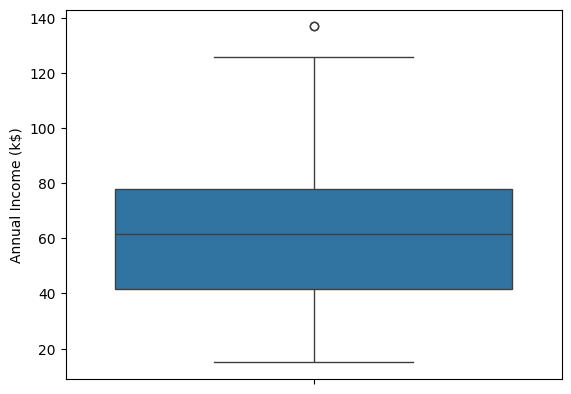

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # or use imputation if needed

# Check for outliers (e.g., using boxplots or IQR)
import seaborn as sns
sns.boxplot(df['Annual Income (k$)'])

# Normalize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income', 'Spending Score'])

2. Exploratory Data Analysis (EDA)

Explore the dataset to understand distributions, relationships, and trends.

Steps:
Visualize distributions of customer attributes (e.g., age, income, spending score).

Identify patterns or correlations between features.

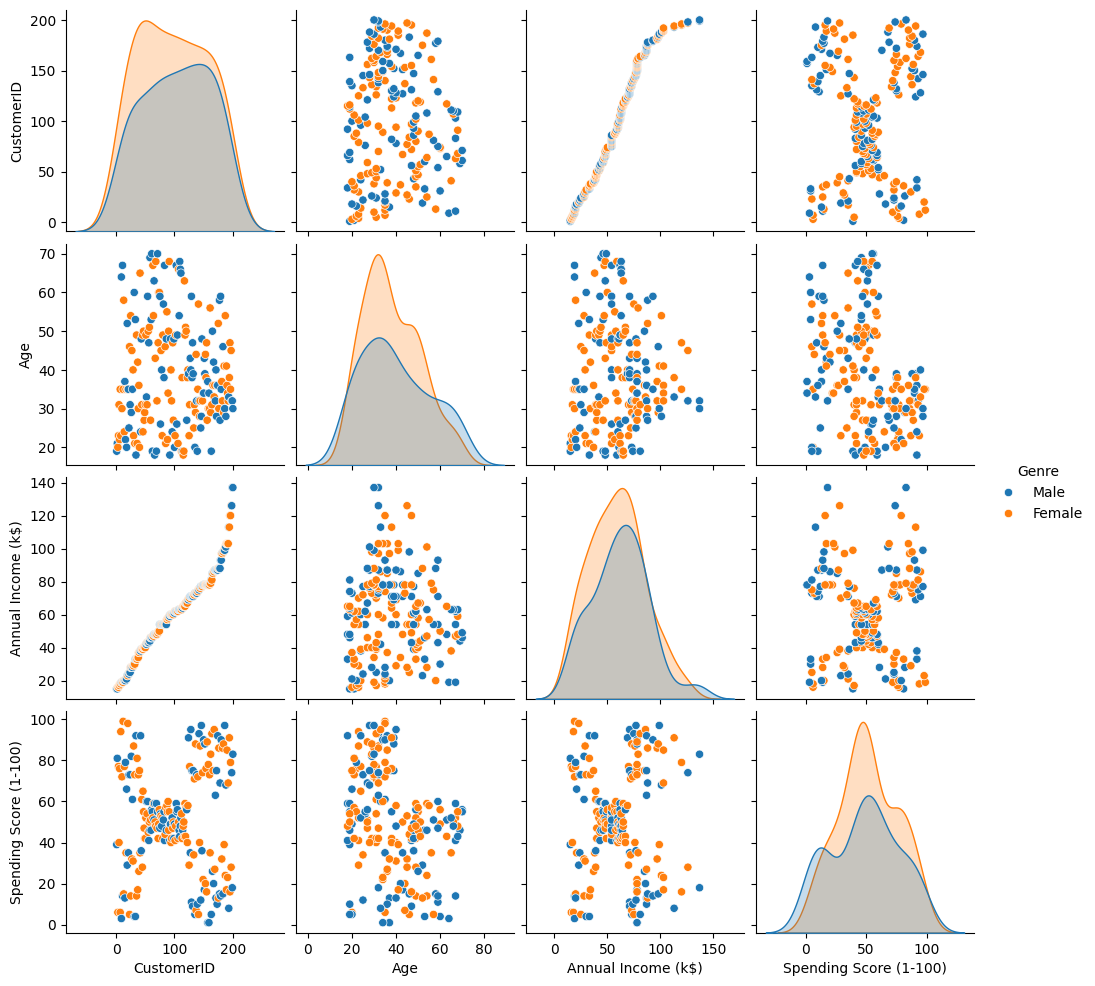

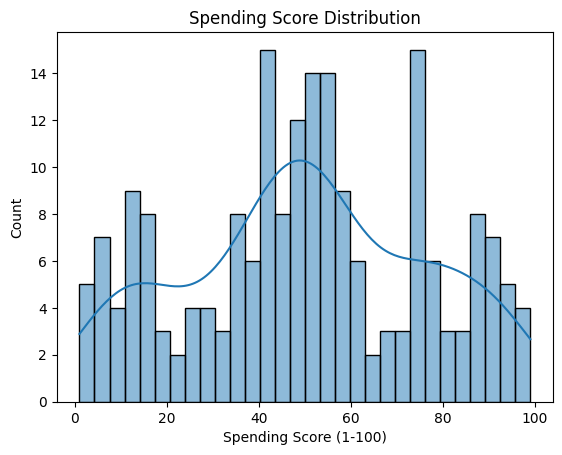

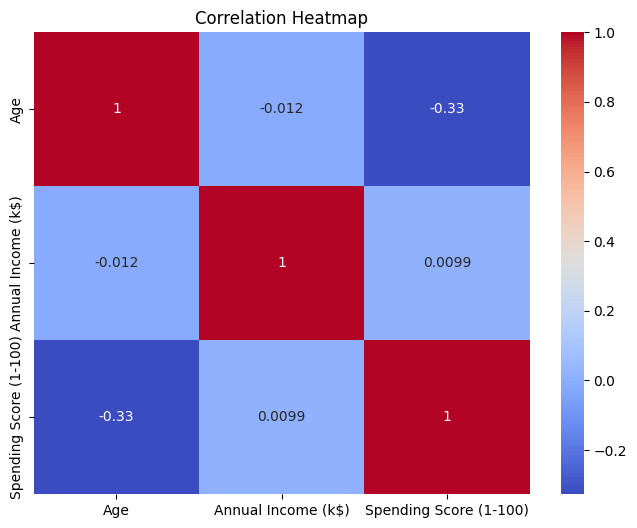

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(df, hue='Genre', diag_kind='kde')
plt.show()

# Distribution of spending score
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

# Correlation heatmap (excluding non-numeric columns like 'Gender')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

3. Clustering Models
Apply clustering algorithms to segment customers.

Steps:
Use K-Means algorithm
 Determine the optimal number of clusters using the Elbow Method or Silhouette Score.



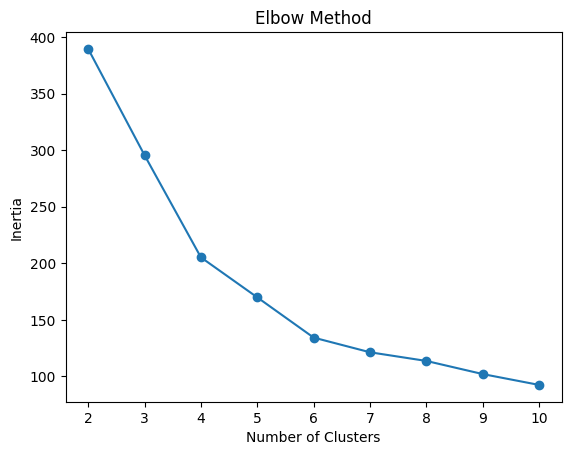

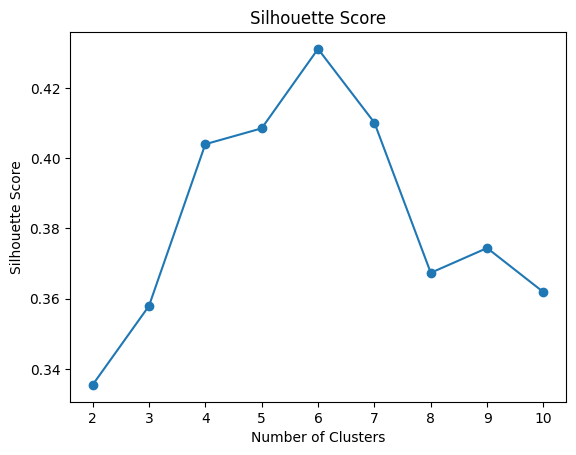

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method to find optimal K
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# Apply K-Means with optimal K
optimal_k = 5  # Example, based on Elbow Method and Silhouette Score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

4. Cluster Profiling

Analyze the characteristics of each cluster and provide actionable insights.

Steps:
Group the data by clusters.

Analyze the mean/median values of features for each cluster.

Provide recommendations based on cluster characteristics.

         CustomerID     Genre        Age  Annual Income (k$)  \
Cluster                                                        
0         68.775862  0.431034  55.275862           47.620690   
1        161.025000  0.450000  32.875000           86.100000   
2         23.461538  0.423077  25.769231           26.115385   
3         86.377778  0.400000  26.733333           54.311111   
4        166.870968  0.516129  44.387097           89.774194   

         Spending Score (1-100)  
Cluster                          
0                     41.706897  
1                     81.525000  
2                     74.846154  
3                     40.911111  
4                     18.483871  
         CustomerID     Genre        Age  Annual Income (k$)  \
Cluster                                                        
0         68.775862  0.431034  55.275862           47.620690   
1        161.025000  0.450000  32.875000           86.100000   
2         23.461538  0.423077  25.769231           26.115

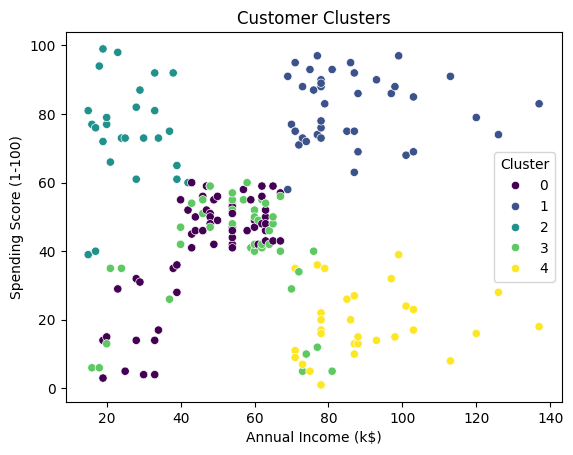

Cluster 0:
Average Age: 55.28
Average Annual Income: 47.62
Average Spending Score: 41.71

Cluster 1:
Average Age: 32.88
Average Annual Income: 86.10
Average Spending Score: 81.53

Cluster 2:
Average Age: 25.77
Average Annual Income: 26.12
Average Spending Score: 74.85

Cluster 3:
Average Age: 26.73
Average Annual Income: 54.31
Average Spending Score: 40.91

Cluster 4:
Average Age: 44.39
Average Annual Income: 89.77
Average Spending Score: 18.48



In [8]:
# Encode 'Gender' column as numeric (Male = 1, Female = 0)
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})

# Analyze cluster characteristics (including encoded 'Gender')
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)
# Analyze cluster characteristics
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

# Visualize clusters
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Clusters')
plt.show()

# Example insights
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(f"Average Age: {cluster_profile.loc[cluster, 'Age']:.2f}")
    print(f"Average Annual Income: {cluster_profile.loc[cluster, 'Annual Income (k$)']:.2f}")
    print(f"Average Spending Score: {cluster_profile.loc[cluster, 'Spending Score (1-100)']:.2f}")
    print()

Cluster Distribution:

Visualize the distribution of customers across clusters using a bar plot or pie chart.

Example:

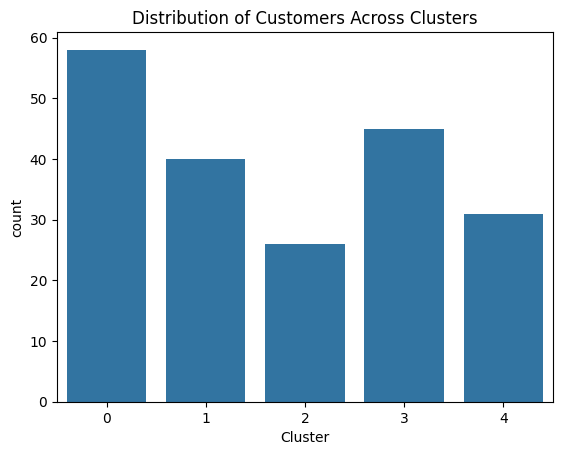

In [12]:
sns.countplot(data=df, x='Cluster')
plt.title('Distribution of Customers Across Clusters')
plt.show()

Gender Distribution in Clusters:

Analyze the gender distribution within each cluster using a stacked bar plot.

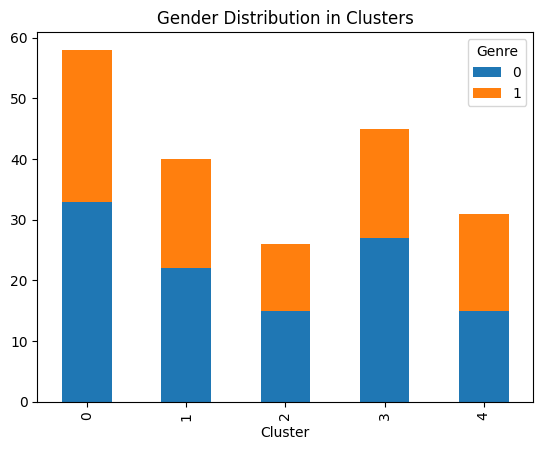

In [15]:
gender_cluster = df.groupby(['Cluster', 'Genre']).size().unstack()
gender_cluster.plot(kind='bar', stacked=True)
plt.title('Gender Distribution in Clusters')
plt.show()

Cluster Characteristics:

Use scatter plots to visualize clusters based on key features like income and spending score.

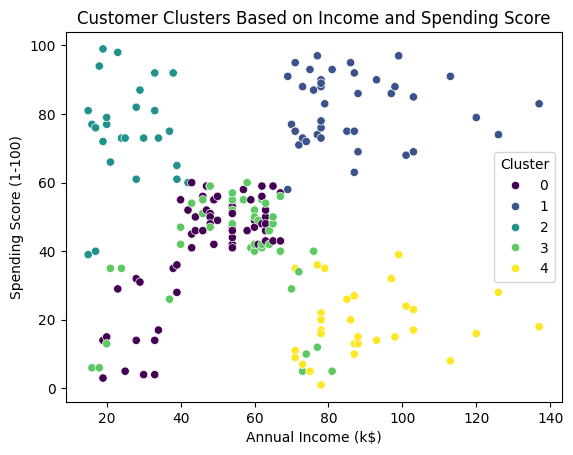

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Clusters Based on Income and Spending Score')
plt.show()

5. **Reporting**

Document the process and findings, and visualize the clusters.

Steps:
Summarize the data preparation and modeling approach.

Visualize clusters using PCA for 2D projection.

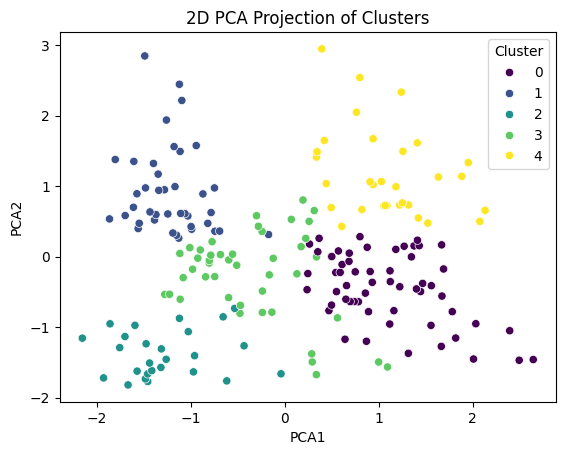

In [9]:
from sklearn.decomposition import PCA

# PCA for 2D projection
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot clusters in 2D
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('2D PCA Projection of Clusters')
plt.show()

# Save the final dataset with clusters
df.to_csv('Mall_Customers_Clustered.csv', index=False)

General Insights

**Income vs. Spending:**

Customers with high income do not always have a high spending score, indicating that income alone is not a predictor of spending behavior.

Customers with moderate income often have the highest spending scores, suggesting they are the most engaged.

**Age vs. Spending:**

Younger customers tend to have moderate spending scores, while older customers may have lower or higher spending scores depending on their income.

**Gender Distribution:**

Analyze the gender distribution within each cluster to tailor marketing campaigns. For example:

If a cluster has a higher proportion of females, target them with products or services that appeal to women.

If a cluster has a balanced gender distribution, use gender-neutral marketing strategies.

Actionable Recommendations

Personalized Marketing:

Send high-income, low-spending customers exclusive offers to encourage spending.

Reward high-spending customers with loyalty programs.

Product Recommendations:

Promote luxury items to high-income, high-spending customers.

Offer budget-friendly options to low-income, low-spending customers.

Customer Retention:

Focus on retaining high-value customers (e.g., high-income, high-spending and moderate-income, high-spending clusters).

Provide exceptional customer service and personalized experiences to keep them engaged.

Customer Acquisition:

Use social media ads to attract young, trendy customers.

Partner with luxury brands to attract high-income customers.

Create budget-friendly sections for price-sensitive customers.

Cluster Insights and Recommendations

Using K-Means clustering (with k=5), customers are often segmented into the following groups:

**Cluster 0: High Income, Low Spending**

***Characteristics:***

High annual income.

Low spending score.

***Insights:***

These customers have the financial capacity to spend but are not engaging with the mall's offerings.

They may be dissatisfied with the current product range or services.

***Recommendations:***

Conduct surveys to understand their preferences.

Offer premium products or exclusive deals to encourage spending.

Provide personalized services to enhance their shopping experience.

**Cluster 1: Moderate Income, High Spending**

Characteristics
Moderate annual income.

High spending score.

*Insights:*

These customers are highly engaged and contribute significantly to the mall's revenue.

They are likely to be loyal customers.

Recommendations:

Reward their loyalty with discounts, loyalty programs, or VIP memberships.

Target them with promotions for new or trending products.

Maintain a strong relationship through personalized communication.

**Cluster 2: Low Income, Low Spending**

Characteristics:

Low annual income.

Low spending score.

Insights:

These customers are budget-conscious and spend minimally.

They may be price-sensitive or have limited disposable income.

Recommendations:

Offer budget-friendly products and discounts.

Promote value-for-money deals and seasonal sales.

Avoid targeting them with premium or high-end products.

**Cluster 3: High Income, High Spending**

Characteristics:

High annual income.

High spending score.

Insights:

These are the most valuable customers, contributing significantly to revenue.

They are likely to be affluent and enjoy shopping.

Recommendations:

Offer luxury products and exclusive experiences.

Provide personalized services, such as personal shopping assistants.

Target them with high-end promotions and events.

**Cluster 4: Young, Moderate Spending**

Characteristics:

Young age.

Moderate spending score.

Insights:

These customers are young and may be students or early-career professionals.

They are likely to be interested in trendy and affordable products.

Recommendations:

Promote trendy and fashionable items.

Offer student discounts or youth-focused promotions.

Engage them through social media and influencer marketing.
